In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-jan-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-jan-2022/train.csv
/kaggle/input/tabular-playground-series-jan-2022/test.csv
/kaggle/input/gdp-20152019-finland-norway-and-sweden/GDP_data_2015_to_2019_Finland_Norway_Sweden.csv


# Basic EDA

In [2]:
train = pd.read_csv('../input/tabular-playground-series-jan-2022/train.csv')
test = pd.read_csv('../input/tabular-playground-series-jan-2022/test.csv')
sample_submit = pd.read_csv('../input/tabular-playground-series-jan-2022/sample_submission.csv')

In [3]:
train.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [4]:
train.shape

(26298, 6)

In [5]:
train.isnull().sum()

row_id      0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [6]:
train['country'].value_counts()

Finland    8766
Norway     8766
Sweden     8766
Name: country, dtype: int64

In [7]:
train['store'].value_counts()

KaggleMart    13149
KaggleRama    13149
Name: store, dtype: int64

In [8]:
train['product'].value_counts()

Kaggle Mug        8766
Kaggle Hat        8766
Kaggle Sticker    8766
Name: product, dtype: int64

In [9]:
train.describe()

,row_id,num_sold
count,26298.000000,26298.000000
mean,13148.500000,387.533577
std,7591.723026,266.076193
min,0.000000,70.000000
25%,6574.250000,190.000000
50%,13148.500000,315.000000
75%,19722.750000,510.000000
max,26297.000000,2884.000000


In [10]:
test.head()

,row_id,date,country,store,product
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat


In [11]:
test.shape

(6570, 5)

In [12]:
test.isnull().sum()

row_id     0
date       0
country    0
store      0
product    0
dtype: int64

In [13]:
test['country'].value_counts()

Finland    2190
Norway     2190
Sweden     2190
Name: country, dtype: int64

In [14]:
test['store'].value_counts()

KaggleMart    3285
KaggleRama    3285
Name: store, dtype: int64

In [15]:
test['product'].value_counts()

Kaggle Mug        2190
Kaggle Hat        2190
Kaggle Sticker    2190
Name: product, dtype: int64

In [16]:
test.describe()

,row_id
count,6570.000000
mean,29582.500000
std,1896.739966
min,26298.000000
25%,27940.250000
50%,29582.500000
75%,31224.750000
max,32867.000000


# Feature Engineering

In [17]:
data = pd.concat([train, test], axis=0, ignore_index=True)
data

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329.0
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520.0
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146.0
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572.0
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911.0
...,...,...,...,...,...,...
32863,32863,2019-12-31,Sweden,KaggleMart,Kaggle Hat,NaN
32864,32864,2019-12-31,Sweden,KaggleMart,Kaggle Sticker,NaN
32865,32865,2019-12-31,Sweden,KaggleRama,Kaggle Mug,NaN
32866,32866,2019-12-31,Sweden,KaggleRama,Kaggle Hat,NaN


In [18]:
from datetime import datetime, date

data['date'] = pd.to_datetime(data.date, format = '%Y/%m/%d')
data

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329.0
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520.0
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146.0
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572.0
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911.0
...,...,...,...,...,...,...
32863,32863,2019-12-31,Sweden,KaggleMart,Kaggle Hat,NaN
32864,32864,2019-12-31,Sweden,KaggleMart,Kaggle Sticker,NaN
32865,32865,2019-12-31,Sweden,KaggleRama,Kaggle Mug,NaN
32866,32866,2019-12-31,Sweden,KaggleRama,Kaggle Hat,NaN


## Holidays features

In [19]:
import holidays

holiday_FI = holidays.CountryHoliday('FI', years=[2015, 2016, 2017, 2018, 2019])

holiday_FI

{datetime.date(2016, 1, 1): 'Uudenvuodenpäivä', datetime.date(2016, 1, 6): 'Loppiainen', datetime.date(2016, 3, 25): 'Pitkäperjantai', datetime.date(2016, 3, 27): 'Pääsiäispäivä', datetime.date(2016, 3, 28): '2. pääsiäispäivä', datetime.date(2016, 5, 1): 'Vappu', datetime.date(2016, 5, 5): 'Helatorstai', datetime.date(2016, 5, 15): 'Helluntaipäivä', datetime.date(2016, 6, 25): 'Juhannuspäivä', datetime.date(2016, 11, 5): 'Pyhäinpäivä', datetime.date(2016, 12, 6): 'Itsenäisyyspäivä', datetime.date(2016, 12, 25): 'Joulupäivä', datetime.date(2016, 12, 26): 'Tapaninpäivä', datetime.date(2016, 6, 24): 'Juhannusaatto', datetime.date(2016, 12, 24): 'Jouluaatto', datetime.date(2017, 1, 1): 'Uudenvuodenpäivä', datetime.date(2017, 1, 6): 'Loppiainen', datetime.date(2017, 4, 14): 'Pitkäperjantai', datetime.date(2017, 4, 16): 'Pääsiäispäivä', datetime.date(2017, 4, 17): '2. pääsiäispäivä', datetime.date(2017, 5, 1): 'Vappu', datetime.date(2017, 5, 25): 'Helatorstai', datetime.date(2017, 6, 4): 'He

In [20]:
data.loc[data['country'] == 'Finland', 'holiday_name'] = data[data['country'] == 'Finland']['date'].map(holiday_FI)

data

,row_id,date,country,store,product,num_sold,holiday_name
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329.0,Uudenvuodenpäivä
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520.0,Uudenvuodenpäivä
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146.0,Uudenvuodenpäivä
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572.0,Uudenvuodenpäivä
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911.0,Uudenvuodenpäivä
...,...,...,...,...,...,...,...
32863,32863,2019-12-31,Sweden,KaggleMart,Kaggle Hat,NaN,NaN
32864,32864,2019-12-31,Sweden,KaggleMart,Kaggle Sticker,NaN,NaN
32865,32865,2019-12-31,Sweden,KaggleRama,Kaggle Mug,NaN,NaN
32866,32866,2019-12-31,Sweden,KaggleRama,Kaggle Hat,NaN,NaN


In [21]:
holiday_NO = holidays.CountryHoliday('NO', years=[2015, 2016, 2017, 2018, 2019])
holiday_NO

{datetime.date(2016, 1, 1): 'Første nyttårsdag', datetime.date(2016, 5, 1): 'Arbeidernes dag', datetime.date(2016, 5, 17): 'Grunnlovsdag', datetime.date(2016, 12, 25): 'Første juledag', datetime.date(2016, 12, 26): 'Andre juledag', datetime.date(2016, 3, 24): 'Skjærtorsdag', datetime.date(2016, 3, 25): 'Langfredag', datetime.date(2016, 3, 27): 'Første påskedag', datetime.date(2016, 3, 28): 'Andre påskedag', datetime.date(2016, 5, 5): 'Kristi himmelfartsdag', datetime.date(2016, 5, 15): 'Første pinsedag', datetime.date(2016, 5, 16): 'Andre pinsedag', datetime.date(2017, 1, 1): 'Første nyttårsdag', datetime.date(2017, 5, 1): 'Arbeidernes dag', datetime.date(2017, 5, 17): 'Grunnlovsdag', datetime.date(2017, 12, 25): 'Første juledag', datetime.date(2017, 12, 26): 'Andre juledag', datetime.date(2017, 4, 13): 'Skjærtorsdag', datetime.date(2017, 4, 14): 'Langfredag', datetime.date(2017, 4, 16): 'Første påskedag', datetime.date(2017, 4, 17): 'Andre påskedag', datetime.date(2017, 5, 25): 'Krist

In [22]:
data.loc[data['country'] == 'Norway', 'holiday_name'] = data[data['country'] == 'Norway']['date'].map(holiday_NO)

data

,row_id,date,country,store,product,num_sold,holiday_name
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329.0,Uudenvuodenpäivä
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520.0,Uudenvuodenpäivä
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146.0,Uudenvuodenpäivä
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572.0,Uudenvuodenpäivä
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911.0,Uudenvuodenpäivä
...,...,...,...,...,...,...,...
32863,32863,2019-12-31,Sweden,KaggleMart,Kaggle Hat,NaN,NaN
32864,32864,2019-12-31,Sweden,KaggleMart,Kaggle Sticker,NaN,NaN
32865,32865,2019-12-31,Sweden,KaggleRama,Kaggle Mug,NaN,NaN
32866,32866,2019-12-31,Sweden,KaggleRama,Kaggle Hat,NaN,NaN


In [23]:
holiday_SE = holidays.CountryHoliday('SE', years=[2015, 2016, 2017, 2018, 2019])
holiday_SE

{datetime.date(2016, 1, 3): 'Söndag', datetime.date(2016, 1, 10): 'Söndag', datetime.date(2016, 1, 17): 'Söndag', datetime.date(2016, 1, 24): 'Söndag', datetime.date(2016, 1, 31): 'Söndag', datetime.date(2016, 2, 7): 'Söndag', datetime.date(2016, 2, 14): 'Söndag', datetime.date(2016, 2, 21): 'Söndag', datetime.date(2016, 2, 28): 'Söndag', datetime.date(2016, 3, 6): 'Söndag', datetime.date(2016, 3, 13): 'Söndag', datetime.date(2016, 3, 20): 'Söndag', datetime.date(2016, 3, 27): 'Påskdagen, Söndag', datetime.date(2016, 4, 3): 'Söndag', datetime.date(2016, 4, 10): 'Söndag', datetime.date(2016, 4, 17): 'Söndag', datetime.date(2016, 4, 24): 'Söndag', datetime.date(2016, 5, 1): 'Första maj, Söndag', datetime.date(2016, 5, 8): 'Söndag', datetime.date(2016, 5, 15): 'Pingstdagen, Söndag', datetime.date(2016, 5, 22): 'Söndag', datetime.date(2016, 5, 29): 'Söndag', datetime.date(2016, 6, 5): 'Söndag', datetime.date(2016, 6, 12): 'Söndag', datetime.date(2016, 6, 19): 'Söndag', datetime.date(2016, 

In [24]:
data.loc[data['country'] == 'Sweden', 'holiday_name'] = data[data['country'] == 'Sweden']['date'].map(holiday_SE)

data

,row_id,date,country,store,product,num_sold,holiday_name
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329.0,Uudenvuodenpäivä
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520.0,Uudenvuodenpäivä
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146.0,Uudenvuodenpäivä
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572.0,Uudenvuodenpäivä
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911.0,Uudenvuodenpäivä
...,...,...,...,...,...,...,...
32863,32863,2019-12-31,Sweden,KaggleMart,Kaggle Hat,NaN,Nyårsafton
32864,32864,2019-12-31,Sweden,KaggleMart,Kaggle Sticker,NaN,Nyårsafton
32865,32865,2019-12-31,Sweden,KaggleRama,Kaggle Mug,NaN,Nyårsafton
32866,32866,2019-12-31,Sweden,KaggleRama,Kaggle Hat,NaN,Nyårsafton


In [25]:
data['is_holiday'] = np.where(data['holiday_name'].notnull(), 1, 0)
data['is_holiday'].value_counts()

0    30108
1     2760
Name: is_holiday, dtype: int64

In [26]:
gdp_df = pd.read_csv('../input/gdp-20152019-finland-norway-and-sweden/GDP_data_2015_to_2019_Finland_Norway_Sweden.csv',
                    index_col='year')

gdp_exponent = 1.2121103201489674 # see https://www.kaggle.com/ambrosm/tpsjan22-03-linear-model for an explanation

def get_gdp(row):
    """Return the GDP based on row.country and row.date.year"""
    country = 'GDP_' + row.country
    return gdp_df.loc[row.date.year, country] ** gdp_exponent

temp = pd.DataFrame(data.apply(get_gdp, axis=1))

In [27]:
data['GDP'] = temp
temp

,0
0,746.001839
1,746.001839
2,746.001839
3,746.001839
4,746.001839
...,...
32863,2022.844961
32864,2022.844961
32865,2022.844961
32866,2022.844961


In [28]:
data

,row_id,date,country,store,product,num_sold,holiday_name,is_holiday,GDP
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329.0,Uudenvuodenpäivä,1,746.001839
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520.0,Uudenvuodenpäivä,1,746.001839
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146.0,Uudenvuodenpäivä,1,746.001839
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572.0,Uudenvuodenpäivä,1,746.001839
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911.0,Uudenvuodenpäivä,1,746.001839
...,...,...,...,...,...,...,...,...,...
32863,32863,2019-12-31,Sweden,KaggleMart,Kaggle Hat,NaN,Nyårsafton,1,2022.844961
32864,32864,2019-12-31,Sweden,KaggleMart,Kaggle Sticker,NaN,Nyårsafton,1,2022.844961
32865,32865,2019-12-31,Sweden,KaggleRama,Kaggle Mug,NaN,Nyårsafton,1,2022.844961
32866,32866,2019-12-31,Sweden,KaggleRama,Kaggle Hat,NaN,Nyårsafton,1,2022.844961


In [29]:
import dateutil.easter as easter
def engineer(df):
    """Return a new dataframe with the engineered features"""
    # Easter
    easter_date = df.date.apply(lambda date: pd.Timestamp(easter.easter(date.year)))
    df['days_from_easter'] = (df.date - easter_date).dt.days.clip(-5, 65)
    
    # Last Sunday of May (Mother's Day)
    sun_may_date = df.date.dt.year.map({2015: pd.Timestamp(('2015-5-31')),
                                         2016: pd.Timestamp(('2016-5-29')),
                                         2017: pd.Timestamp(('2017-5-28')),
                                         2018: pd.Timestamp(('2018-5-27')),
                                         2019: pd.Timestamp(('2019-5-26'))})
    #new_df['days_from_sun_may'] = (df.date - sun_may_date).dt.days.clip(-1, 9)
    
    # Last Wednesday of June
    wed_june_date = df.date.dt.year.map({2015: pd.Timestamp(('2015-06-24')),
                                         2016: pd.Timestamp(('2016-06-29')),
                                         2017: pd.Timestamp(('2017-06-28')),
                                         2018: pd.Timestamp(('2018-06-27')),
                                         2019: pd.Timestamp(('2019-06-26'))})
    df['days_from_wed_jun'] = (df.date - wed_june_date).dt.days.clip(-5, 5)
    
    # First Sunday of November (second Sunday is Father's Day)
    sun_nov_date = df.date.dt.year.map({2015: pd.Timestamp(('2015-11-1')),
                                         2016: pd.Timestamp(('2016-11-6')),
                                         2017: pd.Timestamp(('2017-11-5')),
                                         2018: pd.Timestamp(('2018-11-4')),
                                         2019: pd.Timestamp(('2019-11-3'))})
    df['days_from_sun_nov'] = (df.date - sun_nov_date).dt.days.clip(-1, 9)
    
    return df

In [30]:
data = engineer(data)
data

,row_id,date,country,store,product,num_sold,holiday_name,is_holiday,GDP,days_from_easter,days_from_wed_jun,days_from_sun_nov
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329.0,Uudenvuodenpäivä,1,746.001839,-5,-5,-1
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520.0,Uudenvuodenpäivä,1,746.001839,-5,-5,-1
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146.0,Uudenvuodenpäivä,1,746.001839,-5,-5,-1
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572.0,Uudenvuodenpäivä,1,746.001839,-5,-5,-1
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911.0,Uudenvuodenpäivä,1,746.001839,-5,-5,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
32863,32863,2019-12-31,Sweden,KaggleMart,Kaggle Hat,NaN,Nyårsafton,1,2022.844961,65,5,9
32864,32864,2019-12-31,Sweden,KaggleMart,Kaggle Sticker,NaN,Nyårsafton,1,2022.844961,65,5,9
32865,32865,2019-12-31,Sweden,KaggleRama,Kaggle Mug,NaN,Nyårsafton,1,2022.844961,65,5,9
32866,32866,2019-12-31,Sweden,KaggleRama,Kaggle Hat,NaN,Nyårsafton,1,2022.844961,65,5,9


## Convert the Categorical variables to encodering

In [31]:
from sklearn import preprocessing

# （2）Convert the Categorical variables to encodering
cat = ['country', 'store', 'product', 'holiday_name']
for feature in cat:
    encoder = preprocessing.LabelEncoder()
    data[feature] = data[feature].astype('str') 
    data[feature] = encoder.fit_transform(data[feature])
data

,row_id,date,country,store,product,num_sold,holiday_name,is_holiday,GDP,days_from_easter,days_from_wed_jun,days_from_sun_nov
0,0,2015-01-01,0,0,1,329.0,48,1,746.001839,-5,-5,-1
1,1,2015-01-01,0,0,0,520.0,48,1,746.001839,-5,-5,-1
2,2,2015-01-01,0,0,2,146.0,48,1,746.001839,-5,-5,-1
3,3,2015-01-01,0,1,1,572.0,48,1,746.001839,-5,-5,-1
4,4,2015-01-01,0,1,0,911.0,48,1,746.001839,-5,-5,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
32863,32863,2019-12-31,2,0,0,NaN,33,1,2022.844961,65,5,9
32864,32864,2019-12-31,2,0,2,NaN,33,1,2022.844961,65,5,9
32865,32865,2019-12-31,2,1,1,NaN,33,1,2022.844961,65,5,9
32866,32866,2019-12-31,2,1,0,NaN,33,1,2022.844961,65,5,9


## Time features

In [32]:
data['year'] = data['date'].dt.year 
data['quarter'] = data['date'].dt.quarter
data['month'] = data['date'].dt.month  
data['week'] = data['date'].dt.isocalendar().week.astype('int64')
data['day'] = data['date'].dt.day  
data['weekday'] = data['date'].dt.weekday
data['dayofweek'] = data['date'].dt.dayofweek  
data['dayofyear'] = data['date'].dt.dayofyear  
data['weekofyear'] = data['date'].dt.isocalendar().week.astype('int64')
data['dayofmonth'] = data['date'].dt.days_in_month  
data['is_weekend'] = np.where((data['weekday'] == 5) | (data['weekday'] == 6), 1, 0)
data['is_Firday'] = np.where((data['weekday'] == 4), 1, 0)
data

,row_id,date,country,store,product,num_sold,holiday_name,is_holiday,GDP,days_from_easter,...,month,week,day,weekday,dayofweek,dayofyear,weekofyear,dayofmonth,is_weekend,is_Firday
0,0,2015-01-01,0,0,1,329.0,48,1,746.001839,-5,...,1,1,1,3,3,1,1,31,0,0
1,1,2015-01-01,0,0,0,520.0,48,1,746.001839,-5,...,1,1,1,3,3,1,1,31,0,0
2,2,2015-01-01,0,0,2,146.0,48,1,746.001839,-5,...,1,1,1,3,3,1,1,31,0,0
3,3,2015-01-01,0,1,1,572.0,48,1,746.001839,-5,...,1,1,1,3,3,1,1,31,0,0
4,4,2015-01-01,0,1,0,911.0,48,1,746.001839,-5,...,1,1,1,3,3,1,1,31,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32863,32863,2019-12-31,2,0,0,NaN,33,1,2022.844961,65,...,12,1,31,1,1,365,1,31,0,0
32864,32864,2019-12-31,2,0,2,NaN,33,1,2022.844961,65,...,12,1,31,1,1,365,1,31,0,0
32865,32865,2019-12-31,2,1,1,NaN,33,1,2022.844961,65,...,12,1,31,1,1,365,1,31,0,0
32866,32866,2019-12-31,2,1,0,NaN,33,1,2022.844961,65,...,12,1,31,1,1,365,1,31,0,0


## Show features

In [33]:
labels = list(data.columns.values)
labels

['row_id',
 'date',
 'country',
 'store',
 'product',
 'num_sold',
 'holiday_name',
 'is_holiday',
 'GDP',
 'days_from_easter',
 'days_from_wed_jun',
 'days_from_sun_nov',
 'year',
 'quarter',
 'month',
 'week',
 'day',
 'weekday',
 'dayofweek',
 'dayofyear',
 'weekofyear',
 'dayofmonth',
 'is_weekend',
 'is_Firday']

# Data split

In [34]:
labels.remove('row_id')
labels.remove('date')
labels.remove('num_sold')
feature = labels

In [35]:
train = data[data['date'] <= '2017-12-31']
x_train = train[feature]
y_train = np.log(train['num_sold'] / train['GDP'])
x_train

,country,store,product,holiday_name,is_holiday,GDP,days_from_easter,days_from_wed_jun,days_from_sun_nov,year,...,month,week,day,weekday,dayofweek,dayofyear,weekofyear,dayofmonth,is_weekend,is_Firday
0,0,0,1,48,1,746.001839,-5,-5,-1,2015,...,1,1,1,3,3,1,1,31,0,0
1,0,0,0,48,1,746.001839,-5,-5,-1,2015,...,1,1,1,3,3,1,1,31,0,0
2,0,0,2,48,1,746.001839,-5,-5,-1,2015,...,1,1,1,3,3,1,1,31,0,0
3,0,1,1,48,1,746.001839,-5,-5,-1,2015,...,1,1,1,3,3,1,1,31,0,0
4,0,1,0,48,1,746.001839,-5,-5,-1,2015,...,1,1,1,3,3,1,1,31,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19723,2,0,0,34,1,2055.678054,65,5,9,2017,...,12,52,31,6,6,365,52,31,1,0
19724,2,0,2,34,1,2055.678054,65,5,9,2017,...,12,52,31,6,6,365,52,31,1,0
19725,2,1,1,34,1,2055.678054,65,5,9,2017,...,12,52,31,6,6,365,52,31,1,0
19726,2,1,0,34,1,2055.678054,65,5,9,2017,...,12,52,31,6,6,365,52,31,1,0


In [36]:
val = data[(data['date'] > '2017-12-31') & (data['date'] <= '2018-12-31')]
x_val = val[feature]
y_val = np.log(val['num_sold'] / val['GDP'])
x_val

,country,store,product,holiday_name,is_holiday,GDP,days_from_easter,days_from_wed_jun,days_from_sun_nov,year,...,month,week,day,weekday,dayofweek,dayofyear,weekofyear,dayofmonth,is_weekend,is_Firday
19728,0,0,1,48,1,907.505813,-5,-5,-1,2018,...,1,1,1,0,0,1,1,31,0,0
19729,0,0,0,48,1,907.505813,-5,-5,-1,2018,...,1,1,1,0,0,1,1,31,0,0
19730,0,0,2,48,1,907.505813,-5,-5,-1,2018,...,1,1,1,0,0,1,1,31,0,0
19731,0,1,1,48,1,907.505813,-5,-5,-1,2018,...,1,1,1,0,0,1,1,31,0,0
19732,0,1,0,48,1,907.505813,-5,-5,-1,2018,...,1,1,1,0,0,1,1,31,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26293,2,0,0,33,1,2122.351112,65,5,9,2018,...,12,1,31,0,0,365,1,31,0,0
26294,2,0,2,33,1,2122.351112,65,5,9,2018,...,12,1,31,0,0,365,1,31,0,0
26295,2,1,1,33,1,2122.351112,65,5,9,2018,...,12,1,31,0,0,365,1,31,0,0
26296,2,1,0,33,1,2122.351112,65,5,9,2018,...,12,1,31,0,0,365,1,31,0,0


In [37]:
test = data[(data['date'] > '2018-12-31')]
x_test = test[feature]
x_test

,country,store,product,holiday_name,is_holiday,GDP,days_from_easter,days_from_wed_jun,days_from_sun_nov,year,...,month,week,day,weekday,dayofweek,dayofyear,weekofyear,dayofmonth,is_weekend,is_Firday
26298,0,0,1,48,1,880.442567,-5,-5,-1,2019,...,1,1,1,1,1,1,1,31,0,0
26299,0,0,0,48,1,880.442567,-5,-5,-1,2019,...,1,1,1,1,1,1,1,31,0,0
26300,0,0,2,48,1,880.442567,-5,-5,-1,2019,...,1,1,1,1,1,1,1,31,0,0
26301,0,1,1,48,1,880.442567,-5,-5,-1,2019,...,1,1,1,1,1,1,1,31,0,0
26302,0,1,0,48,1,880.442567,-5,-5,-1,2019,...,1,1,1,1,1,1,1,31,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32863,2,0,0,33,1,2022.844961,65,5,9,2019,...,12,1,31,1,1,365,1,31,0,0
32864,2,0,2,33,1,2022.844961,65,5,9,2019,...,12,1,31,1,1,365,1,31,0,0
32865,2,1,1,33,1,2022.844961,65,5,9,2019,...,12,1,31,1,1,365,1,31,0,0
32866,2,1,0,33,1,2022.844961,65,5,9,2019,...,12,1,31,1,1,365,1,31,0,0


In [38]:
x_train['weekofyear'].dtypes

dtype('int64')

XGBoost / LightGBM

In [39]:
def SMAPE(y_true, y_pred):
    denominator = (y_true + np.abs(y_pred)) / 200.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff)

## XGBoost

In [40]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

data_train = xgb.DMatrix(x_train, y_train)
data_val = xgb.DMatrix(x_val, y_val)

paras = {
        'tree_method':'gpu_hist',
        'grow_policy' : 'lossguide',
        'learning_rate': 0.03399878704233446,
        'max_depth': 5,
        'reg_alpha': 0.7814373604498039,
        'reg_lambda': 0.00018093104956619317,
        'max_delta_step': 2,
        'min_child_weight': 14,
        'colsample_bytree': 0.6489299778623602,
        'subsample': 0.6033298718112065,
        'max_leaves': 187,
        }
watchlist = [(data_train,'train'),(data_val,'val')]
n_round = 20000
model = xgb.train(dict(paras),data_train,num_boost_round = n_round,evals = watchlist,
                                 early_stopping_rounds=8000)
data_test = xgb.DMatrix(x_test)
y_sub_1 = model.predict(data_test)
data_val_test = xgb.DMatrix(x_val)
y_val_hat_1 = model.predict(data_val_test)
mean_squared_error_all = mean_squared_error(y_val, y_val_hat_1)
print(f'mean_squared_error_all: {mean_squared_error_all}')
print(f'SMAPE: {SMAPE(np.exp(y_val)* x_val.GDP.values, np.exp(y_val_hat_1)* x_val.GDP.values)}')
fold_importance_df = pd.DataFrame()
fold_importance_df["feature"] = model.get_score().keys()
fold_importance_df["importance"] = model.get_score().values()

[0]	train-rmse:1.99623	val-rmse:2.00078
[1]	train-rmse:1.93890	val-rmse:1.94342
[2]	train-rmse:1.88207	val-rmse:1.88654
[3]	train-rmse:1.82634	val-rmse:1.83077
[4]	train-rmse:1.77242	val-rmse:1.77673
[5]	train-rmse:1.71906	val-rmse:1.72329
[6]	train-rmse:1.66807	val-rmse:1.67226
[7]	train-rmse:1.61686	val-rmse:1.62103
[8]	train-rmse:1.56651	val-rmse:1.57066
[9]	train-rmse:1.51715	val-rmse:1.52128
[10]	train-rmse:1.47144	val-rmse:1.47540
[11]	train-rmse:1.42486	val-rmse:1.42875
[12]	train-rmse:1.37874	val-rmse:1.38261
[13]	train-rmse:1.33395	val-rmse:1.33780
[14]	train-rmse:1.29437	val-rmse:1.29817
[15]	train-rmse:1.25240	val-rmse:1.25615
[16]	train-rmse:1.21569	val-rmse:1.21939
[17]	train-rmse:1.18044	val-rmse:1.18409
[18]	train-rmse:1.14145	val-rmse:1.14509
[19]	train-rmse:1.10856	val-rmse:1.11212
[20]	train-rmse:1.07251	val-rmse:1.07602
[21]	train-rmse:1.03896	val-rmse:1.04245
[22]	train-rmse:1.00954	val-rmse:1.01301
[23]	train-rmse:0.98128	val-rmse:0.98468
[24]	train-rmse:0.94978	va

## XGBoost - plot feature importance

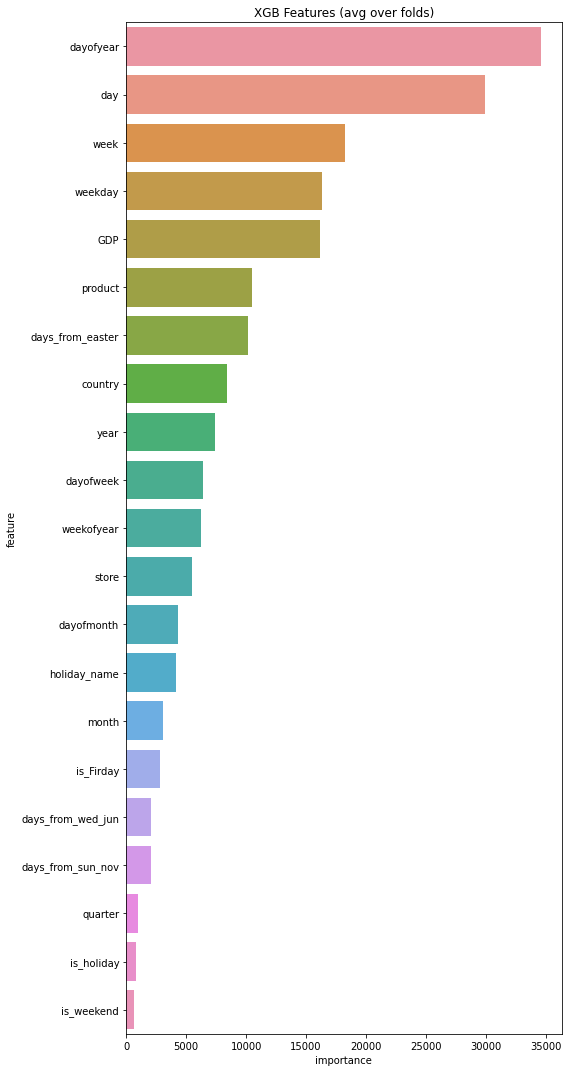

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

N = 30 # TOP 30
cols = (fold_importance_df[["feature", "importance"]] .groupby("feature").mean().sort_values(by="importance" , ascending=False)[:N].index)
best_features = fold_importance_df.loc[fold_importance_df.feature.isin(cols)].sort_values(by='importance',ascending=False)
plt.figure(figsize=(8, 15))
sns.barplot(y="feature", x="importance",data=best_features.sort_values(by="importance", ascending=False))
plt.title('XGB Features (avg over folds)')
plt.tight_layout()
plt.savefig('Xgb_importances_weight.png')
plt.show()